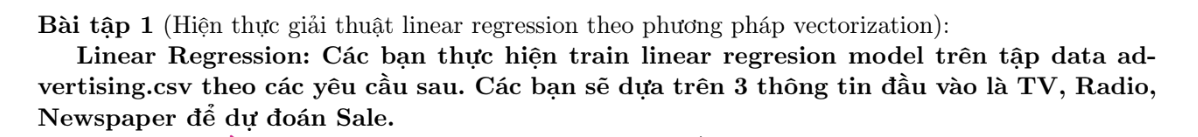

In [2]:
import numpy as np
import matplotlib . pyplot as plt
import random

In [4]:
# dataset
data = np.genfromtxt ('advertising.csv', delimiter =',', skip_header =1)
N = data . shape [0]
X = data [: ,:3]
y = data [: ,3:]
print ( X )
print ( y )

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [221]:
# Normalize input data by using mean normalizaton
def mean_normalization ( X) :
 N = len( X )
 maxi = np .max ( X )
 mini = np .min ( X )
 avg = np . mean ( X )
 X = (X - avg ) / ( maxi - mini )
 X_b = np.hstack([ np . ones (( N , 1) ) , X ])
 return X_b , maxi , mini , avg

X_b , maxi , mini , avg = mean_normalization ( X )
print ( X_b[:5] )

[[ 1.          0.55042679 -0.09835864  0.00757928]
 [ 1.         -0.07575405 -0.09329791 -0.07372976]
 [ 1.         -0.16785931 -0.0710307   0.00791667]
 [ 1.          0.2852446  -0.08655027 -0.02852058]
 [ 1.          0.3840975  -0.18945175 -0.02885796]]


## SGD

In [216]:
def predict(xi, thetas):
    return xi.dot(thetas)

def compute_loss(y_hat, yi):
    return (y_hat - yi)**2 / 2

def compute_gradient(xi, yi, y_hat):
    return (xi.T.dot(y_hat - yi))

def stochastic_gradient_descent ( X_b , y , n_epochs =50 , learning_rate =0.00001) :
    # thetas = np. random . randn (4 , 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837] , [ -0.81960489] ,
                             [1.39501033] ,  [0.29763545]])
    thetas_path = [ thetas ] 
    losses = []
    for epoch in range ( n_epochs ) :
        for i in range ( N ) :
            # select random number in N
            # random_index = np. random . randint (N) #In real application , you  should use this code
            random_index = i # This code is used for this assignment only

            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            # Compute output
            y_hat = predict(xi, thetas)

            # Compute loss li
            loss = compute_loss(y_hat, yi)

            # Compute gradient
            df_dthetas = compute_gradient(xi, yi, y_hat)

            # update theta
            thetas = thetas - learning_rate * df_dthetas

            # logging
            losses.append(loss[0][0])
            thetas_path.append(thetas)
    return thetas_path , losses

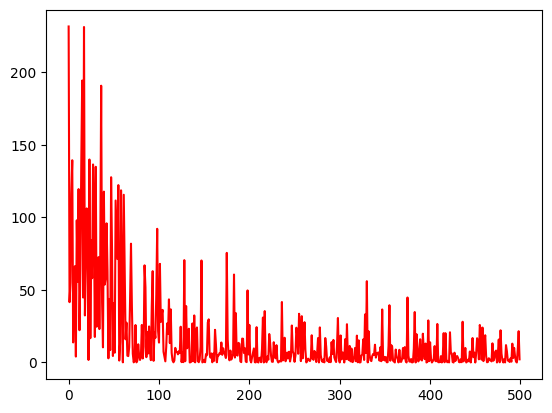

In [217]:
sgd_theta , losses = stochastic_gradient_descent ( X_b , y , n_epochs =50 ,
learning_rate =0.01 )
x_axis = list ( range (500) )
plt . plot ( x_axis , losses [:500] , color ="r")
plt . show ()

# Q1:

In [218]:
sgd_theta , losses = stochastic_gradient_descent ( X_b , y , n_epochs =1 , learning_rate
=0.01 )
print ( np .sum( losses ) )

6754.643359356192


## mini-batch

In [239]:
def predict(xi, thetas):
    return xi.dot(thetas)

def compute_loss(y_hat, yi):
    return (y_hat - yi).T.dot((y_hat - yi)) / 2

def compute_gradient(xi, yi, y_hat):
    k = y_hat - yi
    return (xi.T.dot(k))

def mini_batch_gradient_descent ( X_b , y , n_epochs =50 , minibatch_size =
20 , learning_rate =0.01) :  
    thetas = np.asarray([[1.16270837] , [ -0.81960489] ,
                             [1.39501033] ,  [0.29763545]])
    thetas_path = [ thetas ] 
    losses = []
    for epoch in range ( n_epochs ) :
        shuffled_indices = np . asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
        132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
        185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
        165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
        169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
        77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
        195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
        92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
        174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
        129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
        168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
        133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
        154])
        X_b_shuffled = X_b [ shuffled_indices ]
        y_shuffled = y [ shuffled_indices ]
        for i in range ( 0 , N , minibatch_size ) :
            xi = X_b_shuffled [ i : i + minibatch_size ]
            yi = y_shuffled [ i : i + minibatch_size ]
            # Compute output
            y_hat = predict(xi, thetas)
            # Compute loss li
            loss = compute_loss(y_hat, yi)
            # Compute gradient
            df_dthetas = compute_gradient(xi, yi, y_hat)
            # update parameters
            thetas = thetas - learning_rate * (df_dthetas / minibatch_size)
            thetas_path.append(thetas)
            
            loss_mean = loss[0][0] / minibatch_size
            losses . append (loss_mean)
    return thetas_path , losses

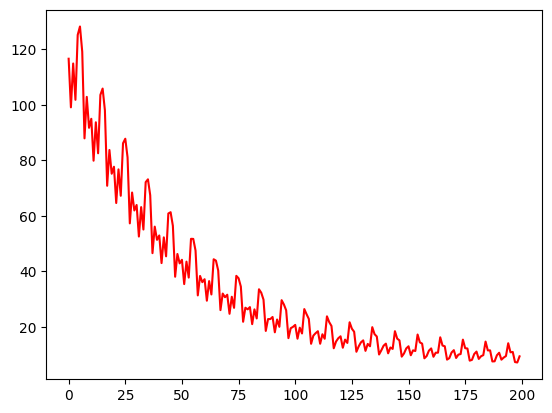

In [240]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,
minibatch_size = 20 , learning_rate =0.01)
x_axis = list ( range (200) )
plt . plot ( x_axis , losses [:200] , color ="r")
plt . show ()

# Q2:

In [241]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,
minibatch_size = 20 , learning_rate =0.01)
print ( round ( sum( losses ) ,2) )

8865.65


## N-batch

In [249]:
def predict(xi, thetas):
    return xi.dot(thetas)

def compute_loss(y_hat, yi):
    return (y_hat - yi).T.dot(y_hat - yi)

def compute_gradient(xi, yi, y_hat):
    k = y_hat - yi # shape(200,1)
    return 2*xi.T.dot(k)

def batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate =0.01) :
    # thetas = np. random . randn (4 , 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837] , [ -0.81960489] ,
                             [1.39501033] ,  [0.29763545]])
    thetas_path = [ thetas ] 
    losses = []
    for epoch in range ( n_epochs ) :
        # Compute output
        y_hat = predict(X_b, thetas)

        # Compute loss li
        loss = compute_loss(y_hat, y)

        # Compute gradient
        df_dthetas = compute_gradient(X_b, y, y_hat)

        # logging
        thetas_path.append(thetas)
        # update theta
        thetas = thetas - learning_rate * (df_dthetas / N)
        losses.append(loss[0][0] / N)
    return thetas_path , losses

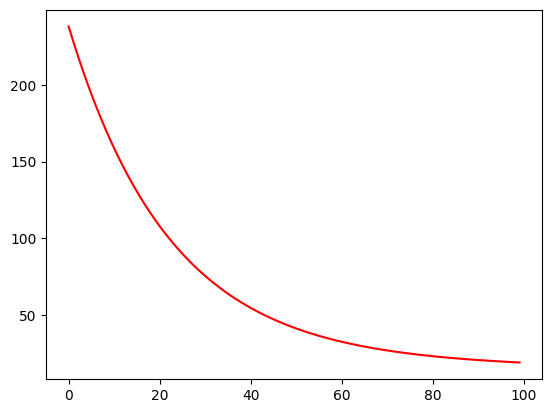

In [250]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate
=0.01)
x_axis = list ( range (100) )
plt . plot ( x_axis , losses [:100] , color ="r")
plt . show ()

# Q3:

In [251]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate
=0.01)
print ( round ( sum( losses ) ,2) )

6716.46
